In [1]:
from w1_feature_fraud_mk import Fraud
# Murat
from w1_feature_fraud_mk import  left_join_on, add_invoice_frequency_features, add_counter_statue_error_occured_features
from w1_feature_fraud_mk import add_counter_regions_features, add_region_fraud_rate_features
from w1_feature_fraud_mk import add_median_billing_frequence_per_region, add_sdt_dev_consumption_region
# Dana
from w1_feature_fraud_mk import calculate_mutual_information, visualize_mutual_information, add_consump_agg

In [2]:
fraud = Fraud(["./data/train/client_train.csv", "./data/train/invoice_train.csv"], target_column="target")
client  = fraud["./data/train/client_train.csv"]
invoice = fraud["./data/train/invoice_train.csv"]
fraud_merged = left_join_on("client_id", client, invoice)

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/w1_feature_fraud_mk.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


In [ ]:
df_fraud_aggregated = fraud.get_target()
df_fraud_aggregated = add_invoice_frequency_features(fraud_merged, df_fraud_aggregated)
df_fraud_aggregated = add_counter_statue_error_occured_features(fraud_merged, df_fraud_aggregated)
df_fraud_aggregated = add_counter_regions_features(fraud_merged, df_fraud_aggregated)
df_fraud_aggregated = add_region_fraud_rate_features(fraud_merged, df_fraud_aggregated)
df_fraud_aggregated = add_median_billing_frequence_per_region(fraud_merged, df_fraud_aggregated)
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_1")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_2")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_3")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_4")
df_fraud_aggregated = add_consump_agg(df_fraud_aggregated, invoice)

In [4]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_fraud_rate,f_region_median_billing_frequence_per,f_region_std_deviation_consumption_level_1,f_region_std_deviation_consumption_level_2,f_region_std_deviation_consumption_level_3,f_region_std_deviation_consumption_level_4
0,train_Client_0,0.0,120.5,3.958607,0.329911,0,0,0.048237,93.0,616.717210,2003.479674,222.937490,1093.990742
1,train_Client_1,0.0,121.5,3.991459,0.332649,0,0,0.087543,84.0,452.375127,1877.001654,132.705638,562.291582
2,train_Client_10,0.0,147.0,4.829172,0.402464,0,0,0.044247,96.0,449.167480,532.622846,101.017420,472.912852
3,train_Client_100,0.0,121.0,3.975033,0.331280,0,0,0.075455,57.0,589.000150,830.326107,144.135304,692.619968
4,train_Client_1000,0.0,124.0,4.073587,0.339493,0,0,0.083856,95.0,455.331350,572.096911,108.254194,504.796898


In [5]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_fraud_rate,f_region_median_billing_frequence_per,f_region_std_deviation_consumption_level_1,f_region_std_deviation_consumption_level_2,f_region_std_deviation_consumption_level_3,f_region_std_deviation_consumption_level_4
0,train_Client_0,0.0,120.5,3.958607,0.329911,0,0,0.048237,93.0,616.717210,2003.479674,222.937490,1093.990742
1,train_Client_1,0.0,121.5,3.991459,0.332649,0,0,0.087543,84.0,452.375127,1877.001654,132.705638,562.291582
2,train_Client_10,0.0,147.0,4.829172,0.402464,0,0,0.044247,96.0,449.167480,532.622846,101.017420,472.912852
3,train_Client_100,0.0,121.0,3.975033,0.331280,0,0,0.075455,57.0,589.000150,830.326107,144.135304,692.619968
4,train_Client_1000,0.0,124.0,4.073587,0.339493,0,0,0.083856,95.0,455.331350,572.096911,108.254194,504.796898


In [6]:
df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target"])

In [7]:
df_fraud_mutual_info

,Feature,MI_Score
0,f_counter_statue_error_occured,0.008485
1,f_region_std_deviation_consumption_level_2,0.008148
2,f_region_std_deviation_consumption_level_3,0.007932
3,f_region_std_deviation_consumption_level_4,0.007526
4,f_region_median_billing_frequence_per,0.007010
5,f_region_std_deviation_consumption_level_1,0.006631
6,f_region_fraud_rate,0.005889
7,f_invoive_date_diff_days,0.002544
8,f_invoive_date_median_months,0.002261
9,f_invoive_date_median_years,0.001603


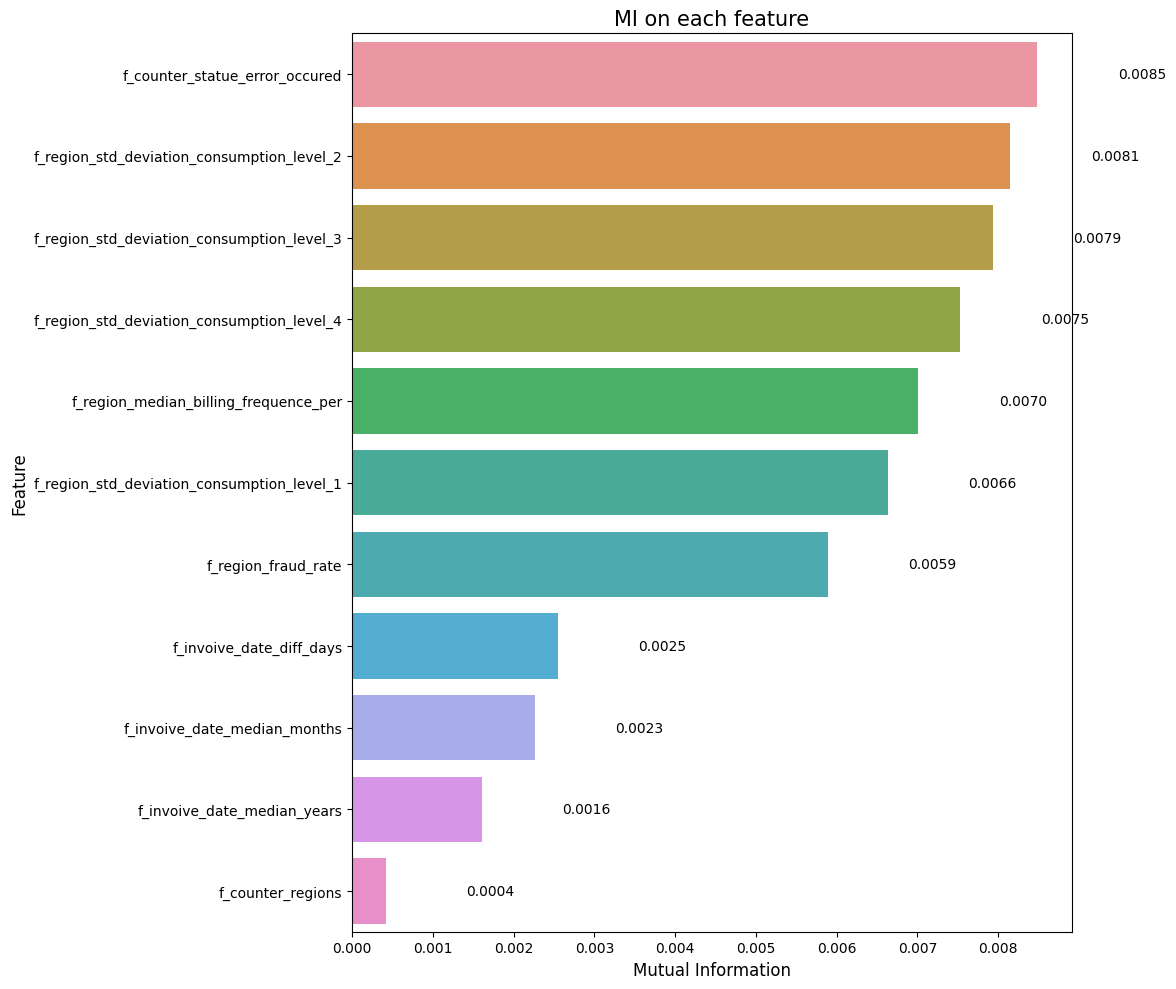

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
visualize_mutual_information(df_fraud_mutual_info, top_n=100)